In [1]:
import random
import operator

import numpy as np
import matplotlib.pyplot as plt

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\Sean\Miniconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Sean\Miniconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Sean\Miniconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Sean\Miniconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
C:\Users\Sean\Miniconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  retu

In [45]:
def gptrain(Train):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
    random.seed(25)

    pset = gp.PrimitiveSet("MAIN", arity=6)
    pset.addPrimitive(np.add, arity=2)
    pset.addPrimitive(np.subtract, arity=2)
    pset.addPrimitive(np.multiply, arity=2)
    pset.addPrimitive(np.negative, arity=1)
    pset.addPrimitive(np.sin, arity=1)
    pset.addPrimitive(np.cos, arity=1)
    pset.addPrimitive(np.tan, arity=1)
    pset.renameArguments(ARG0='x1')
    pset.renameArguments(ARG1='x2')
    pset.renameArguments(ARG2='x3')
    pset.renameArguments(ARG3='x4')
    pset.renameArguments(ARG4='x5')
    pset.renameArguments(ARG5='x6')
    def evalSymbReg(individual, Train, pset):    
        Ytrain = Train[0].values.tolist()
        Xtrain = Train.drop(columns=[0]).values.tolist()
        xtr,xte,ytr,yte = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=10)
        func=gp.compile(expr=individual, pset=pset)
        ypr =[]
        for a in range(len(xtr)):
            ypr.append(func(xtr[a][0],xtr[a][1],xtr[a][2],xtr[a][3],xtr[a][4],xtr[a][5]))
        max_ypr= max(ypr)/2
        for value in range(len(ypr)):
            if ypr[value]<=0:
                ypr[value]=0
            else:
                ypr[value]=1
               
        tn, fp, fn, tp = confusion_matrix(ytr, ypr).ravel()
        return(fp, fn)
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", evalSymbReg, Train = trainXdf,pset=pset)
    toolbox.register("select", tools.selSPEA2)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutNodeReplacement, pset=pset)
 
    
    NGEN = 50
    MU = 300
    LAMBDA = 100
    CXPB = 0.2
    MUTPB = 0.5

    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)

    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                              halloffame=hof)
    fitness_1 = [ind.fitness.values[0] for ind in hof]
    fitness_2 = [ind.fitness.values[1] for ind in hof]
    pop_1 = [ind.fitness.values[0] for ind in pop]
    pop_2 = [ind.fitness.values[1] for ind in pop]

    '''Print dominated population for debugging'''
    # for ind in pop:
    #     print(ind.fitness)

    plt.scatter(pop_1, pop_2, color='b')
    plt.scatter(fitness_1, fitness_2, color='r')
    plt.plot(fitness_1, fitness_2, color='r', drawstyle='steps-post')
    plt.xlabel("Sum of False Positives")
    plt.ylabel("Sum of False Negatives")
    plt.title("Pareto Front")
    plt.show()

    f1 = np.array(fitness_1)
    f2 = np.array(fitness_2)
print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))

NameError: name 'hof' is not defined

C:\Users\Sean\Miniconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Sean\Miniconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg                        	std                        	min    	max        
0  	300   	[164.41666667 112.92333333]	[143.22510158  85.9353485 ]	[0. 0.]	[358. 238.]
1  	71    	[167.58666667 107.39333333]	[158.43449484  95.68715669]	[0. 0.]	[358. 238.]
2  	64    	[117.76 134.8 ]            	[138.55562926  87.60159816]	[0. 0.]	[358. 238.]
3  	76    	[158.40333333 103.08666667]	[142.3021925   78.03426057]	[0. 0.]	[358. 238.]
4  	74    	[173.07        94.50333333]	[151.86500069  85.67689297]	[0. 0.]	[358. 238.]
5  	68    	[129.28333333 116.05666667]	[139.70429386  84.29788524]	[0. 0.]	[350. 238.]
6  	73    	[145.66333333  98.31666667]	[144.43193318  82.10024191]	[0. 0.]	[358. 237.]
7  	71    	[114.22666667 109.74333333]	[136.01647678  85.86313211]	[0. 0.]	[350. 237.]
8  	76    	[137.22666667  83.87      ]	[138.18862214  70.64667791]	[0. 0.]	[350. 237.]
9  	69    	[147.09        68.28666667]	[138.74994979  60.04019061]	[0. 0.]	[350. 238.]
10 	68    	[145.07333333  60.72666667]	[136

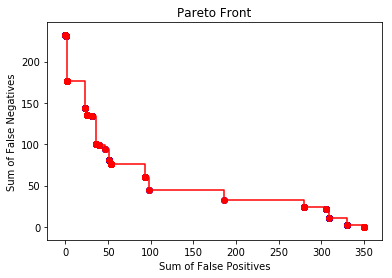

In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.drop(columns=['Cabin','Name','Ticket','SibSp'], inplace=True)
test.drop(columns=['Cabin','Name','Ticket','SibSp'], inplace=True)
columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
train.replace(columns_map, inplace=True)
test.replace(columns_map,inplace =True)
train.set_index(keys=['PassengerId'], drop=True, inplace=True)
test.set_index(keys=['PassengerId'], drop=True, inplace=True)
solver = IterativeImputer(n_iter=5, sample_posterior=True, random_state=1)
TestX=solver.fit_transform(test)
TestXdf = pd.DataFrame(TestX, index=test.index)
TrainX= solver.fit_transform(train)
trainXdf=pd.DataFrame(TrainX, index=train)
GeneticFunction = gptrain(trainXdf)